# Matplotlib fundamenstals 

In [4]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


# EDA - Exploratory data analysis

In [5]:
df.shape

(4377, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [7]:
df.describe()

,Year,Month,Quantity,Pct
count,4377.000000,4377.000000,4377.000000,4377.000000
mean,2011.421065,6.459904,307.802148,2.762257
std,2.906408,3.446815,411.315021,3.635185
min,2007.000000,1.000000,1.000000,0.000000
25%,2009.000000,3.000000,14.000000,0.100000
50%,2011.000000,6.000000,153.000000,1.400000
75%,2014.000000,9.000000,461.000000,4.200000
max,2017.000000,12.000000,3017.000000,22.700000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [10]:
df.head(20)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [28]:
import duckdb

# brand and total quantity for each brand

df_quantity_make = duckdb.query(
    """
             SELECT make, SUM(quantity) as Quantity 
             FROM df 
             GROUP BY make 
             ORDER BY quantity DESC"""
).df()

df_quantity_make.head()

,Make,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


In [29]:
df["Year"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

## Bar chart

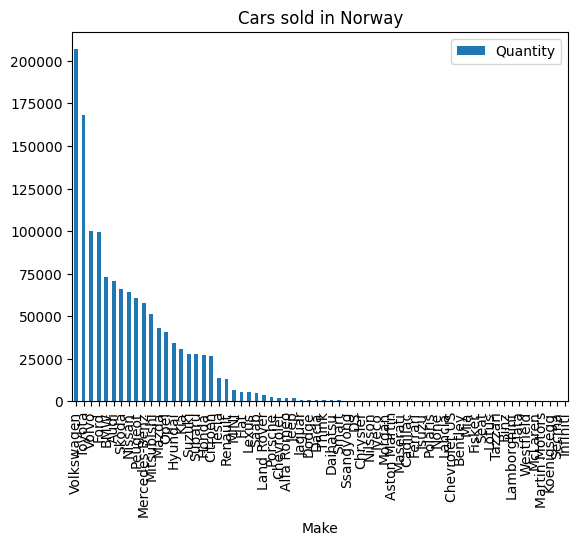

In [32]:
ax = df_quantity_make.plot(kind="bar", x="Make", y="Quantity", title = "Cars sold in Norway");